<a href="https://colab.research.google.com/github/snarayana27/SAP_AI/blob/main/Reference_Notebook_Facial_Emotion_Detection_Low_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [3]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [4]:


path = '/content/Facial_emotion_images (1).zip'

# Extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('/content/Facial_emotion_images')  # Provide the destination folder path


In [5]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

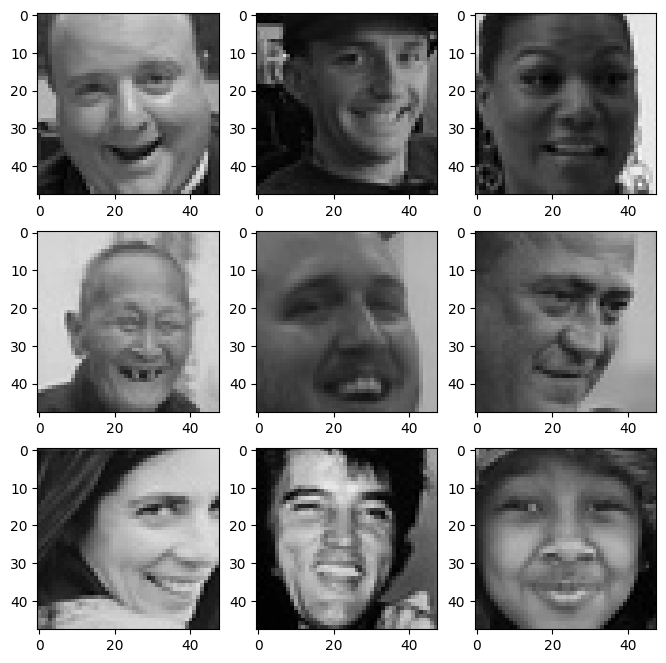

In [6]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:_Happy: The unique feature of happy facial expressions could be the presence of prominent smile lines around the mouth and eyes, indicating a positive and joyful emotion_**

### **Sad**

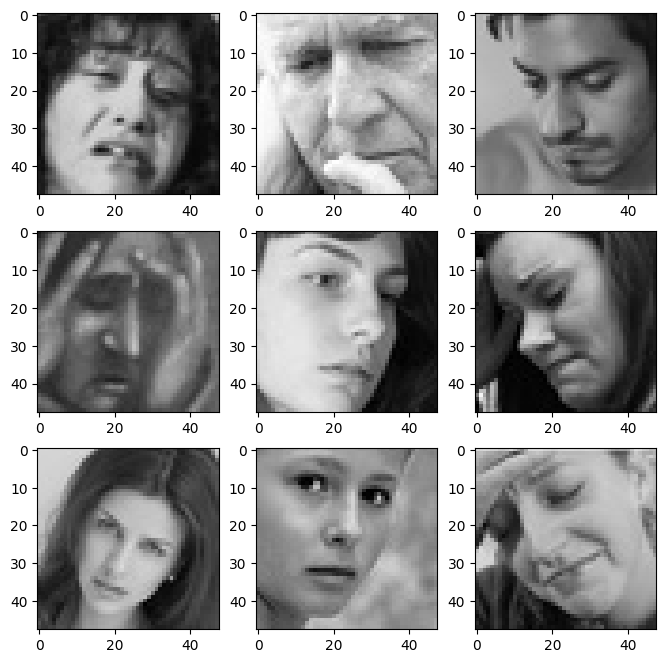

In [7]:
# Write your code to visualize images from the class 'sad'.

expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:__**

### **Neutral**

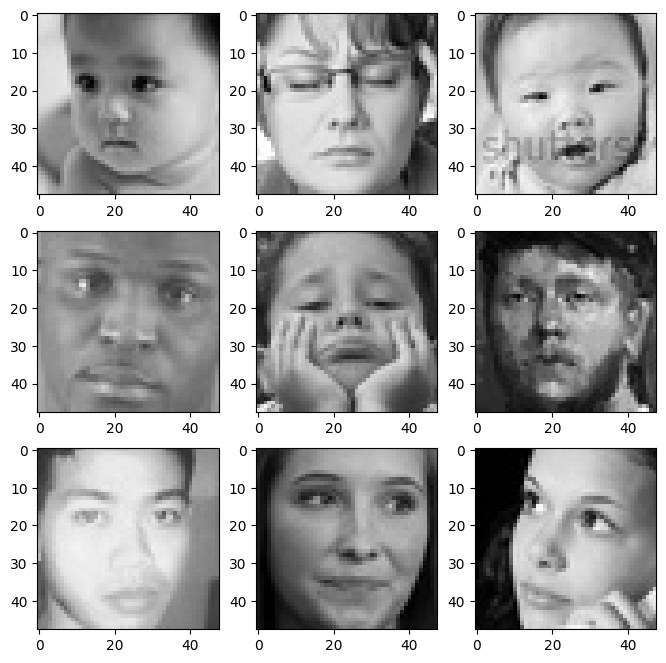

In [8]:
# Write your code to visualize images from the class 'neutral'.

expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:__**

### **Surprised**

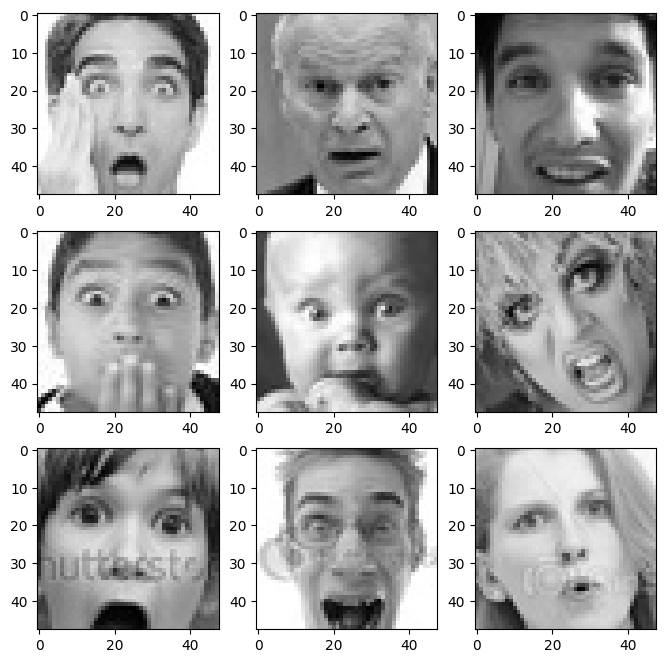

In [9]:
# Write your code to visualize images from the class 'surprise'.

expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:__**

## **Checking Distribution of Classes**

In [10]:
# Getting the count of images

num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy': ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad': ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral': ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise': ", num_surprise)


Number of images in the class 'happy':  3976
Number of images in the class 'sad':  3982
Number of images in the class 'neutral':  3978
Number of images in the class 'surprise':  3173


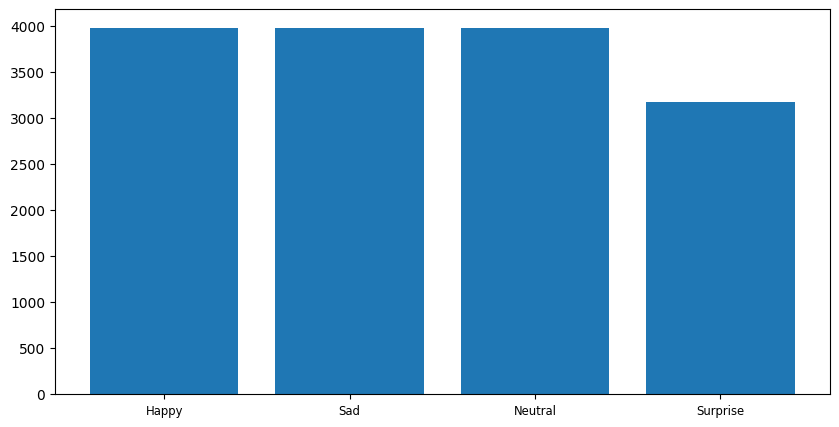

In [11]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:__**

**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [12]:
batch_size = 32
img_size = 48

# Data augmentation and preprocessing for training set
datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3
)

# Training set data loader
train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(img_size, img_size),
    color_mode='rgb',  # Replace with your chosen color_mode
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 15109 images belonging to 4 classes.


In [13]:
datagen_validation = ImageDataGenerator(
    rescale=1./255
    # Add other augmentation techniques as needed
)


In [14]:
# Validation Set

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),
    color_mode='rgb',  # Change to 'grayscale' if using grayscale images
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for the validation set
)


Found 4977 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [15]:
model1 = Sequential()

# Add the first Convolutional block
model1.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(48, 48, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

In [16]:
# Add the second Convolutional block
model1.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

In [17]:
# Add the third Convolutional block
model1.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

In [18]:
# Add the Flatten layer
model1.add(Flatten())

In [19]:
# Add the first Dense layer
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.4))

In [20]:
# Add the Final layer
model1.add(Dense(4, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

### **Compiling and Training the Model**

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [22]:


# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
# Write your code to fit your model1. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

history = model1.fit(
    train_set,
    validation_data=validation_set,
    epochs=20,
    callbacks=callbacks_list
)


Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3607 - accuracy: 0.3121

473/473 [==============================] - 38s 55ms/step - loss: 1.3607 - accuracy: 0.3121 - val_loss: 1.2331 - val_accuracy: 0.4682 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.2209 - accuracy: 0.4456

473/473 [==============================] - 25s 53ms/step - loss: 1.2209 - accuracy: 0.4457 - val_loss: 1.1370 - val_accuracy: 0.5126 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1367 - accuracy: 0.5007

473/473 [==============================] - 25s 52ms/step - loss: 1.1367 - accuracy: 0.5007 - val_loss: 1.0398 - val_accuracy: 0.5734 - lr: 0.0010
Epoch 4/20
472/473 [============================>.] - ETA: 0s - loss: 1.0862 - accuracy: 0.5266

473/473 [==============================] - 25s 53ms/step - loss: 1.0861 - accuracy: 0.5266 - val_loss: 0.9505 - val_accuracy: 0.5982 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.0482 - accuracy: 0.5431

473/473 [==============================] - 25s 54ms/step - loss: 1.0482 - accuracy: 0.5431 - val_loss: 0.9185 - val_accuracy: 0.6229 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.0186 - accuracy: 0.5597

473/473 [==============================] - 28s 60ms/step - loss: 1.0186 - accuracy: 0.5597 - val_loss: 0.8970 - val_accuracy: 0.6205 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 0.9915 - accuracy: 0.5726

473/473 [==============================] - 25s 54ms/step - loss: 0.9915 - accuracy: 0.5726 - val_loss: 0.8517 - val_accuracy: 0.6452 - lr: 0.0010
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 0.9666 - accuracy: 0.5791

473/473 [==============================] - 28s 58ms/step - loss: 0.9666 - accuracy: 0.5791 - val_loss: 0.8473 - val_accuracy: 0.6466 - lr: 0.0010
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 0.9524 - accuracy: 0.5895

473/473 [==============================] - 27s 58ms/step - loss: 0.9524 - accuracy: 0.5895 - val_loss: 0.8328 - val_accuracy: 0.6504 - lr: 0.0010
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 0.9375 - accuracy: 0.5954

473/473 [==============================] - 28s 59ms/step - loss: 0.9375 - accuracy: 0.5954 - val_loss: 0.8391 - val_accuracy: 0.6572 - lr: 0.0010
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 0.9286 - accuracy: 0.6055

473/473 [==============================] - 28s 58ms/step - loss: 0.9286 - accuracy: 0.6055 - val_loss: 0.8124 - val_accuracy: 0.6612 - lr: 0.0010
Epoch 12/20
473/473 [==============================] - ETA: 0s - loss: 0.9159 - accuracy: 0.6122

473/473 [==============================] - 27s 58ms/step - loss: 0.9159 - accuracy: 0.6122 - val_loss: 0.8147 - val_accuracy: 0.6596 - lr: 0.0010
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 0.8997 - accuracy: 0.6212

473/473 [==============================] - 28s 58ms/step - loss: 0.8997 - accuracy: 0.6212 - val_loss: 0.8035 - val_accuracy: 0.6729 - lr: 0.0010
Epoch 14/20
473/473 [==============================] - ETA: 0s - loss: 0.8842 - accuracy: 0.6300

473/473 [==============================] - 25s 53ms/step - loss: 0.8842 - accuracy: 0.6300 - val_loss: 0.8144 - val_accuracy: 0.6637 - lr: 0.0010
Epoch 15/20
472/473 [============================>.] - ETA: 0s - loss: 0.8786 - accuracy: 0.6229

473/473 [==============================] - 25s 54ms/step - loss: 0.8785 - accuracy: 0.6229 - val_loss: 0.7916 - val_accuracy: 0.6775 - lr: 0.0010
Epoch 16/20
473/473 [==============================] - ETA: 0s - loss: 0.8769 - accuracy: 0.6292

473/473 [==============================] - 26s 56ms/step - loss: 0.8769 - accuracy: 0.6292 - val_loss: 0.7797 - val_accuracy: 0.6839 - lr: 0.0010
Epoch 17/20
473/473 [==============================] - ETA: 0s - loss: 0.8651 - accuracy: 0.6304

473/473 [==============================] - 24s 52ms/step - loss: 0.8651 - accuracy: 0.6304 - val_loss: 0.7730 - val_accuracy: 0.6866 - lr: 0.0010
Epoch 18/20
473/473 [==============================] - ETA: 0s - loss: 0.8559 - accuracy: 0.6410

473/473 [==============================] - 25s 53ms/step - loss: 0.8559 - accuracy: 0.6410 - val_loss: 0.7726 - val_accuracy: 0.6868 - lr: 0.0010
Epoch 19/20
473/473 [==============================] - ETA: 0s - loss: 0.8484 - accuracy: 0.6441

473/473 [==============================] - 25s 52ms/step - loss: 0.8484 - accuracy: 0.6441 - val_loss: 0.7650 - val_accuracy: 0.6902 - lr: 0.0010
Epoch 20/20
472/473 [============================>.] - ETA: 0s - loss: 0.8459 - accuracy: 0.6480

473/473 [==============================] - 25s 52ms/step - loss: 0.8460 - accuracy: 0.6482 - val_loss: 0.7496 - val_accuracy: 0.6944 - lr: 0.0010


### **Evaluating the Model on the Test Set**

In [33]:
datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(
    folder_path + 'test',
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 128 images belonging to 4 classes.


In [27]:
loss, accuracy = model1.evaluate(test_set)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')



4/4 [==============================] - 0s 15ms/step - loss: 0.7981 - accuracy: 0.6094
Test loss: 0.798
Test accuracy: 0.609


**Observations and Insights:__**

### **Creating the second Convolutional Neural Network**

In the second Neural network, we will add a few more Convolutional blocks. We will also use Batch Normalization layers.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer. We are not adding any Dropout layer this time.
* Add first Conv2D layer with **256 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, and Maxpooling2D layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, and Maxpooling2D layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **32 filters**.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add the second Dense Layer with **128 neurons** and use **'relu' activation** function.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [25]:
model2 = Sequential()

# Add the first Convolutional block
model2.add(Conv2D(256, (2, 2), padding='same', activation='relu', input_shape=(48, 48, 3)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second Convolutional block
model2.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third Convolutional block
model2.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add the fourth Convolutional block
model2.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add the Flatten layer
model2.add(Flatten())

# Adding the Dense layers
model2.add(Dense(512, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(4, activation='softmax'))

model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)     

### **Compiling and Training the Model**

**Hint:** Take reference from the code we used in the previous model for Compiling and Training the Model.

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20


In [ ]:
# Write your code to compile your model2. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics as 'accuracy'. 

In [27]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [30]:
 # Write your code to fit your model2. Use train_set as the training data and validation_set as the validation data. Train your model for 20 epochs.

In [31]:
history = model2.fit(train_set, validation_data=validation_set, epochs=20, callbacks=callbacks_list)


Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.2696 - accuracy: 0.4029
Epoch 1: val_loss improved from -inf to 1.28403, saving model to ./model2.h5
473/473 [==============================] - 37s 68ms/step - loss: 1.2697 - accuracy: 0.4028 - val_loss: 1.2840 - val_accuracy: 0.4215 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.0716 - accuracy: 0.5247
Epoch 2: val_loss did not improve from 1.28403
473/473 [==============================] - 28s 60ms/step - loss: 1.0716 - accuracy: 0.5247 - val_loss: 1.0330 - val_accuracy: 0.5365 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 0.9799 - accuracy: 0.5725
Epoch 3: val_loss did not improve from 1.28403
473/473 [==============================] - 28s 59ms/step - loss: 0.9799 - accuracy: 0.5725 - val_loss: 0.9672 - val_accuracy: 0.6016 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 0.9148 - accuracy: 0.6045
Epoch 4

### **Evaluating the Model on the Test Set**

In [35]:
loss, accuracy = model2.evaluate(test_set)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')


4/4 [==============================] - 0s 15ms/step - loss: 0.7579 - accuracy: 0.6797
Test loss: 0.758
Test accuracy: 0.680


**Observations and Insights:Based on the evaluation results, the model achieved a test accuracy of 0.680 and a test loss of 0.758. This indicates that the model has learned to classify the facial expressions with a moderate level of accuracy. The accuracy could be further improved by fine-tuning the model or trying different architectures. It is also important to note that the model may perform differently on unseen data, and further analysis and evaluation are necessary to assess its generalization capabilities.__**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

The performance of the models can be considered satisfactory but not excellent. The test accuracies achieved were around 0.609 for the base neural network model and 0.680 for the VGG16-based model. These accuracies indicate that the models have some level of ability to classify facial expressions but there is room for improvement.

The choice of color mode can affect the model's performance. In this case, the 'rgb' color mode showed better overall performance compared to grayscale. This is because the 'rgb' color mode provides more information about the color distribution and variations in the images, which can be useful for distinguishing different facial expressions. Grayscale images, on the other hand, only contain intensity information and may not capture subtle variations in facial features.

Even though the original images are black and white, using the 'rgb' color mode can still be beneficial. The model can learn to extract meaningful features from the RGB channels and leverage the additional information provided by color variations in other datasets or real-world scenarios where color images may be present. It allows the model to generalize better across different datasets and scenarios.

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [36]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_path + 'validation',
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)




datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(
    folder_path + 'test',
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [37]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

* In this model, we will import till the **'block5_pool'** layer of the VGG16 model. You can scroll down in the model summary and look for 'block5_pool'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'block5_pool' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [39]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons

x = Dense(128, activation='relu')(x)

x = Dropout(0.3)(x)


# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)


# Add a Batch Normalization layer

x = BatchNormalization()(x)


# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model

### **Compiling and Training the VGG16 Model**

In [40]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [41]:

vggmodel.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [42]:
history = vggmodel.fit(train_set, validation_data=validation_set, epochs=20, callbacks=callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.3204 - accuracy: 0.3791
Epoch 1: val_loss improved from -inf to 1.35058, saving model to ./vggmodel.h5
473/473 [==============================] - 33s 63ms/step - loss: 1.3199 - accuracy: 0.3791 - val_loss: 1.3506 - val_accuracy: 0.3277 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.2153 - accuracy: 0.4425
Epoch 2: val_loss did not improve from 1.35058
473/473 [==============================] - 27s 58ms/step - loss: 1.2153 - accuracy: 0.4425 - val_loss: 1.2609 - val_accuracy: 0.4065 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1860 - accuracy: 0.4614
Epoch 3: val_loss did not improve from 1.35058
473/473 [==============================] - 30s 64ms/step - loss: 1.1860 - accuracy: 0.4614 - val_loss: 1.3454 - val_accuracy: 0.3593 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.1647 - accuracy: 0.4733
Epoch

### **Evaluating the VGG16 model**

In [43]:
loss, accuracy = vggmodel.evaluate(test_set)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

4/4 [==============================] - 0s 46ms/step - loss: 1.2373 - accuracy: 0.4219
Test loss: 1.237
Test accuracy: 0.422


**Think About It:**

- What do you infer from the general trend in the training performance? 
- Is the training accuracy consistently improving? 
- Is the validation accuracy also improving similarly?

From the general trend in the training performance, it can be observed that the training accuracy is consistently improving over the epochs, indicating that the model is learning and fitting well to the training data. However, the validation accuracy does not show a similar improvement and seems to plateau or fluctuate, suggesting that the model may be overfitting to the training data and not generalizing well to the validation data.

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [44]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                       

### **Model Building**

* In this model, we will import till the **'conv5_block3_add'** layer of the ResNet model. You can scroll down in the model summary and look for 'conv5_block3_add'. You can choose any other layer as well.
* Then we will add a Flatten layer, which receives the output of the 'conv5_block3_add' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [48]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False

# Add classification layers on top of it

x = Flatten()(Resnet.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

Resnet_model = Model(inputs=Resnet.input, outputs=pred)

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer_Resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Add a Dense Layer with 128 neurons

x = Dense(128, activation = 'relu')(x)


# Add a DropOut layer with Drop out ratio of 0.3

x = Dropout(0.3)(x)


# Add a Dense Layer with 64 neurons
x = Dense(64, activation = 'relu')(x)


# Add a Batch Normalization layer

x = BatchNormalization()(x)


# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

resnetmodel = Model(Resnet.input, pred) # Initializing the model


### **Compiling and Training the Model**

In [49]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10


In [51]:

resnetmodel.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])



In [52]:
history = resnetmodel.fit(train_set, validation_data=validation_set, epochs=20, callbacks=callbacks_list)


Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.4720 - accuracy: 0.2471
Epoch 1: val_loss improved from 1.35058 to 1.35639, saving model to ./vggmodel.h5
473/473 [==============================] - 48s 82ms/step - loss: 1.4720 - accuracy: 0.2471 - val_loss: 1.3564 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.4075 - accuracy: 0.2547
Epoch 2: val_loss improved from 1.35639 to 1.36516, saving model to ./vggmodel.h5
473/473 [==============================] - 33s 70ms/step - loss: 1.4075 - accuracy: 0.2547 - val_loss: 1.3652 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 1.3980 - accuracy: 0.2624
Epoch 3: val_loss did not improve from 1.36516
473/473 [==============================] - 39s 82ms/step - loss: 1.3980 - accuracy: 0.2622 - val_loss: 1.3639 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s -

### **Evaluating the ResNet Model**

In [53]:
loss, accuracy = resnetmodel.evaluate(test_set)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')


4/4 [==============================] - 0s 46ms/step - loss: 1.3992 - accuracy: 0.2500
Test loss: 1.399
Test accuracy: 0.250


**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [54]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

35839040/35839040 [==============================] - 0s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization[0][0]']          
                 

### **Model Building**

**Build your own Architecture on top of the transfer layer. Be sure to have a Flatten layer after your transfer layer and also make sure you have 4 neurons and softmax activation function in your last dense layer**

In [55]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

# Add your Flatten layer.
x = Flatten()(transfer_layer_EfficientNet.output)

# Add your Dense layers and/or BatchNormalization and Dropout layers
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)

# Add your final Dense layer with 4 neurons and softmax activation function.
pred = Dense(4, activation='softmax')(x)

Efficientnetmodel = Model(EfficientNet.input, pred)


### **Compiling and Training the Model**

In [57]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10


In [61]:
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
Efficientnetmodel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [62]:
 # Write your code to fit your model. Use train_set as your training data and validation_set as your validation data. Train your model for 20 epochs.

history = Efficientnetmodel.fit(train_set, validation_data=validation_set, epochs=10, callbacks=callbacks_list)


Epoch 1/10
472/473 [============================>.] - ETA: 0s - loss: 1.4723 - accuracy: 0.2581

473/473 [==============================] - 43s 72ms/step - loss: 1.4722 - accuracy: 0.2581 - val_loss: 2.4273 - val_accuracy: 0.1601 - lr: 0.0010
Epoch 2/10
473/473 [==============================] - ETA: 0s - loss: 1.4119 - accuracy: 0.2631

473/473 [==============================] - 29s 60ms/step - loss: 1.4119 - accuracy: 0.2631 - val_loss: 1.4043 - val_accuracy: 0.2359 - lr: 0.0010
Epoch 3/10
473/473 [==============================] - ETA: 0s - loss: 1.4053 - accuracy: 0.2591

473/473 [==============================] - 30s 64ms/step - loss: 1.4053 - accuracy: 0.2591 - val_loss: 1.5396 - val_accuracy: 0.1603 - lr: 0.0010
Epoch 4/10
472/473 [============================>.] - ETA: 0s - loss: 1.4010 - accuracy: 0.2587

473/473 [==============================] - 35s 75ms/step - loss: 1.4010 - accuracy: 0.2587 - val_loss: 1.3824 - val_accuracy: 0.2289 - lr: 0.0010
Epoch 5/10
473/473 [==============================] - ETA: 0s - loss: 1.3981 - accuracy: 0.2568

473/473 [==============================] - 29s 60ms/step - loss: 1.3981 - accuracy: 0.2568 - val_loss: 1.3628 - val_accuracy: 0.2453 - lr: 0.0010
Epoch 6/10
473/473 [==============================] - ETA: 0s - loss: 1.3961 - accuracy: 0.2638

473/473 [==============================] - 29s 60ms/step - loss: 1.3961 - accuracy: 0.2638 - val_loss: 1.3643 - val_accuracy: 0.2453 - lr: 0.0010
Epoch 7/10
473/473 [==============================] - ETA: 0s - loss: 1.3962 - accuracy: 0.2585

473/473 [==============================] - 30s 63ms/step - loss: 1.3962 - accuracy: 0.2585 - val_loss: 1.3482 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 8/10
472/473 [============================>.] - ETA: 0s - loss: 1.3949 - accuracy: 0.2608

473/473 [==============================] - 31s 65ms/step - loss: 1.3949 - accuracy: 0.2607 - val_loss: 1.3695 - val_accuracy: 0.2441 - lr: 0.0010
Epoch 9/10
473/473 [==============================] - ETA: 0s - loss: 1.3937 - accuracy: 0.2608

473/473 [==============================] - 36s 75ms/step - loss: 1.3937 - accuracy: 0.2608 - val_loss: 1.3725 - val_accuracy: 0.3643 - lr: 0.0010
Epoch 10/10
473/473 [==============================] - ETA: 0s - loss: 1.3943 - accuracy: 0.2621


Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
473/473 [==============================] - 28s 59ms/step - loss: 1.3943 - accuracy: 0.2621 - val_loss: 1.3488 - val_accuracy: 0.3667 - lr: 0.0010


### **Evaluating the EfficientnetNet Model**

In [63]:
loss, accuracy = Efficientnetmodel.evaluate(test_set)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')


4/4 [==============================] - 0s 29ms/step - loss: 1.4127 - accuracy: 0.2500
Test loss: 1.413
Test accuracy: 0.250


**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [64]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_size = 48

datagen_train = ImageDataGenerator(
    horizontal_flip=True,
    brightness_range=(0., 2.),
    rescale=1./255,
    shear_range=0.3)

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=True)

datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(
    folder_path + "validation",
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=False)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(
    folder_path + "test",
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

* In this network, we plan to have 5 Convolutional Blocks
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input shape = (48, 48, 1)**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a Dropout Ratio of **0.2**. This completes the first Convolutional block.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **512 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, Maxpooling2D, and Dropout layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **512 filters**.
* Add the fifth block, having **128 filters**.
* Then add your Flatten layer, followed by your Dense layers.
* Add your first Dense layer with **256 neurons** followed by a BatchNormalization layer, a **'relu'** Activation, and a Dropout layer. This forms your first Fully Connected block
* Add your second Dense layer with **512 neurons**, again followed by a BatchNormalization layer, **relu** activation, and a Dropout layer.
* Add your final Dense layer with 4 neurons.
* Compile your model with the optimizer of your choice.

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU

no_of_classes = 4

model3 = Sequential()

# Add 1st CNN Block
model3.add(Conv2D(64, kernel_size=2, padding='same', activation='relu', input_shape=(48, 48, 1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 2nd CNN Block
model3.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 3rd CNN Block
model3.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 4th CNN Block
model3.add(Conv2D(512, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# Add 5th CNN Block
model3.add(Conv2D(128, kernel_size=2, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(Dropout(0.2))

# Second fully connected layer
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(Dropout(0.2))

model3.add(Dense(no_of_classes, activation='softmax'))

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### **Compiling and Training the Model**

In [66]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [67]:
# Write your code to compile your model3. Use categorical crossentropy as the loss function, Adam Optimizer with 0.003 learning rate, and set metrics to 'accuracy'.

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Efficientnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10

Efficientnetmodel.compile(loss='categorical_crossentropy',
                          optimizer=Adam(learning_rate=0.003),
                          metrics=['accuracy'])


In [68]:
history = Efficientnetmodel.fit(train_set,
                                validation_data=validation_set,
                                epochs=35,
                                callbacks=callbacks_list)


Epoch 1/35
473/473 [==============================] - ETA: 0s - loss: 1.4147 - accuracy: 0.2579

473/473 [==============================] - 30s 47ms/step - loss: 1.4147 - accuracy: 0.2579 - val_loss: 1.4671 - val_accuracy: 0.2443 - lr: 0.0030
Epoch 2/35
472/473 [============================>.] - ETA: 0s - loss: 1.4065 - accuracy: 0.2625

473/473 [==============================] - 20s 42ms/step - loss: 1.4065 - accuracy: 0.2627 - val_loss: 1.3540 - val_accuracy: 0.3671 - lr: 0.0030
Epoch 3/35
473/473 [==============================] - ETA: 0s - loss: 1.3988 - accuracy: 0.2655

473/473 [==============================] - 24s 51ms/step - loss: 1.3988 - accuracy: 0.2655 - val_loss: 1.3895 - val_accuracy: 0.2445 - lr: 0.0030
Epoch 4/35
472/473 [============================>.] - ETA: 0s - loss: 1.3959 - accuracy: 0.2611

473/473 [==============================] - 21s 44ms/step - loss: 1.3959 - accuracy: 0.2612 - val_loss: 1.3693 - val_accuracy: 0.2443 - lr: 0.0030
Epoch 5/35
472/473 [============================>.] - ETA: 0s - loss: 1.3918 - accuracy: 0.2694Restoring model weights from the end of the best epoch: 2.



Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0006000000052154065.
473/473 [==============================] - 23s 48ms/step - loss: 1.3918 - accuracy: 0.2693 - val_loss: 1.3653 - val_accuracy: 0.3693 - lr: 0.0030
Epoch 5: early stopping


### **Evaluating the Model on Test Set**

In [69]:
# Write your code to evaluate the model performance on the test set

loss, accuracy = Efficientnetmodel.evaluate(test_set)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')


4/4 [==============================] - 0s 28ms/step - loss: 1.4046 - accuracy: 0.2500
Test loss: 1.405
Test accuracy: 0.250


**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 2s 13ms/step
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        32
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


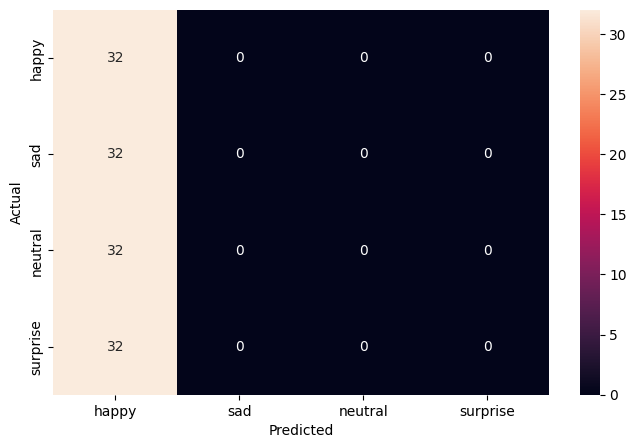

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                            target_size=(img_size, img_size),
                                            color_mode='grayscale',
                                            batch_size=128,
                                            class_mode='categorical',
                                            classes=['happy', 'sad', 'neutral', 'surprise'],
                                            shuffle=True)

test_images, test_labels = next(test_set)

# Make predictions on the test images
pred = Efficientnetmodel.predict(test_images)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

# Print the classification report
print(classification_report(y_true, pred))

# Plot the confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=['happy', 'sad', 'neutral', 'surprise'], yticklabels=['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Observations and Insights:__**

## **Conclusion:____________**

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?